In [1]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# view all columns 
pd.set_option('display.max_columns', None)

In [27]:
path = r'C:\Users\OJO Timilehin\Documents\Portfolio Dataset\ML Classification\bank_marketing/bank-full.csv'
bank = pd.read_csv(path)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [35]:
np.random.randint(1, 4, (2, 3))

array([[3, 1, 3],
       [3, 1, 2]])

In [28]:
# shape of the dataset 
bank.shape

(45211, 17)

In [4]:
# null values 
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- There is no null value, this dataset is clean.

In [5]:
# datatypes and number of unique values 
for feature in bank.columns: 
    print(f'{feature}: {bank[feature].dtype}, {bank[feature].nunique()} unique values')

age: int64, 77 unique values
job: object, 12 unique values
marital: object, 3 unique values
education: object, 4 unique values
default: object, 2 unique values
balance: int64, 7168 unique values
housing: object, 2 unique values
loan: object, 2 unique values
contact: object, 3 unique values
day: int64, 31 unique values
month: object, 12 unique values
duration: int64, 1573 unique values
campaign: int64, 48 unique values
pdays: int64, 559 unique values
previous: int64, 41 unique values
poutcome: object, 4 unique values
y: object, 2 unique values


## Exploratory Data Analysis

In [6]:
bank[bank.duplicated() == True]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


- there are no duplicates in this dataset

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dependent(Target) Variable

In [29]:
bank['y'].value_counts(normalize = True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

- this dataset has an imbalanced target variable

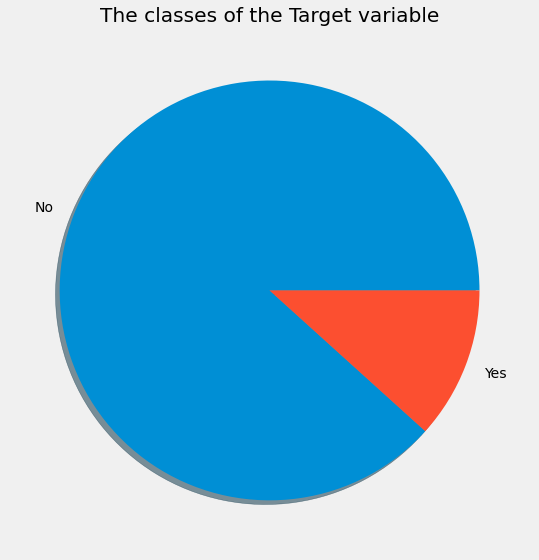

In [15]:
# pie chart
plt.figure(figsize = (8, 8))
slices = bank['y'].value_counts()
labels = ['No', 'Yes']
plt.pie(x = slices, labels = labels, shadow = True)
plt.title('The classes of the Target variable')
plt.tight_layout()
plt.show()

### Categorical Variables 

- Categorical variables in this dataset are features with unique values of 12 or less than

In [30]:
cat_var = [feature for feature in bank.columns if bank[feature].nunique() <= 12]
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [31]:
bank[cat_var].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


### Cardinality of Categorical variables

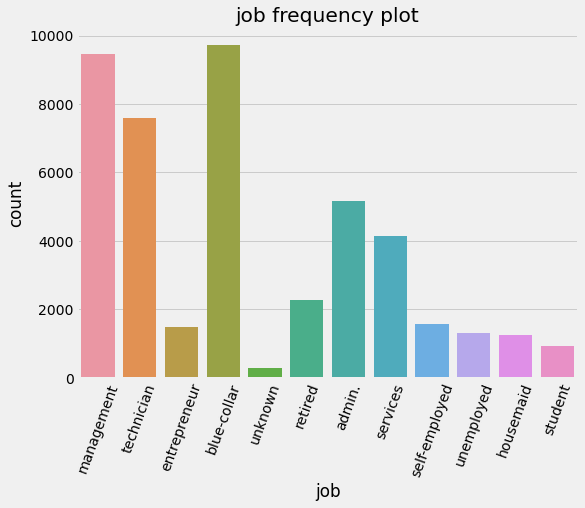

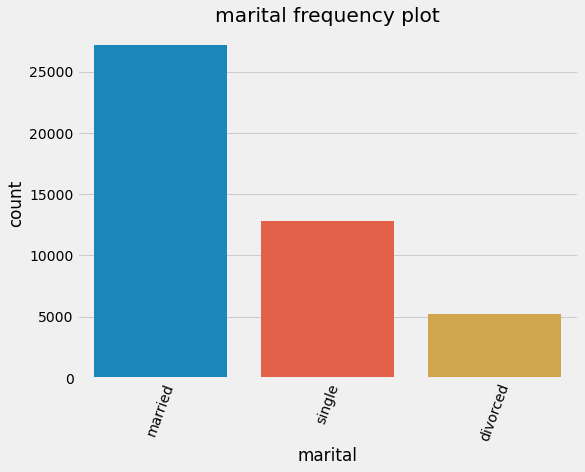

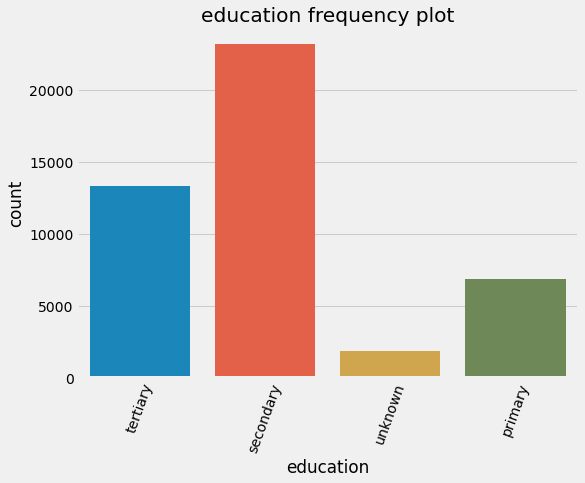

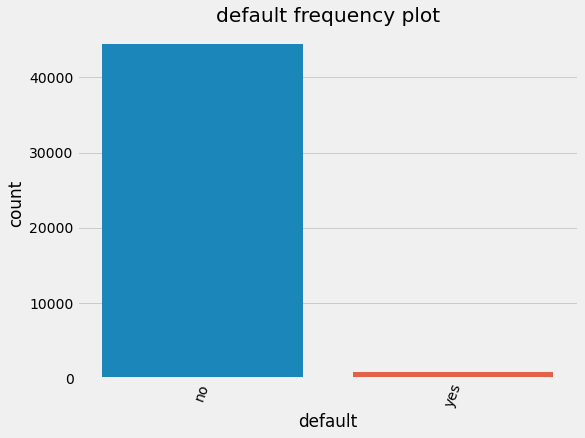

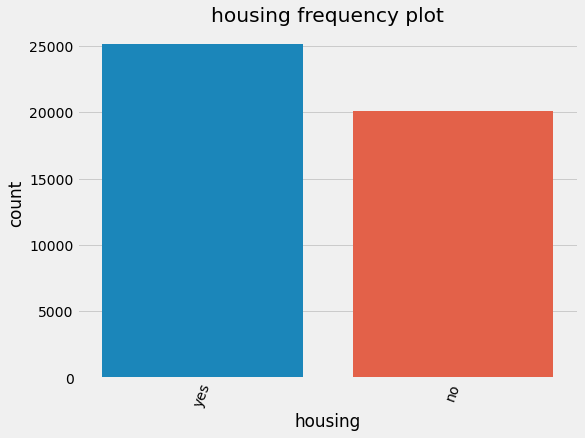

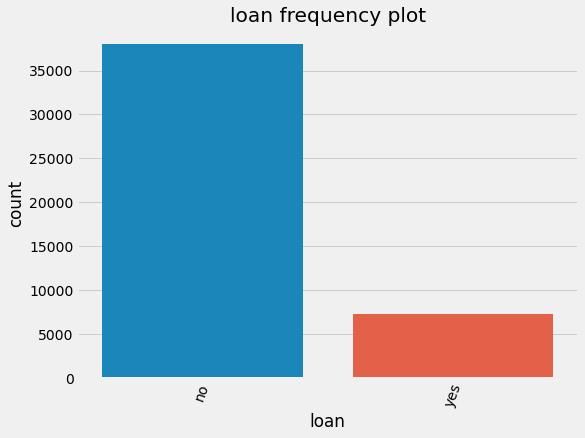

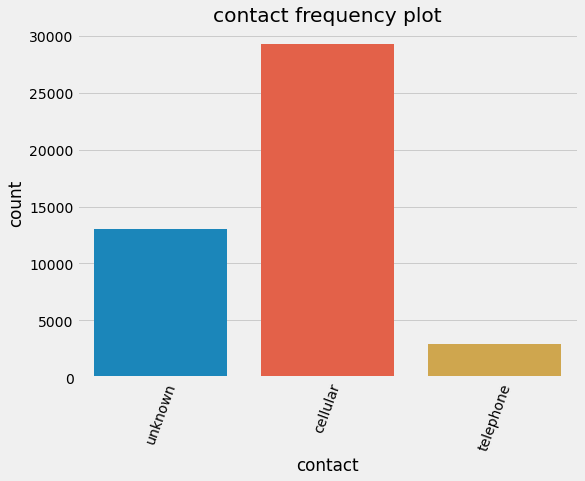

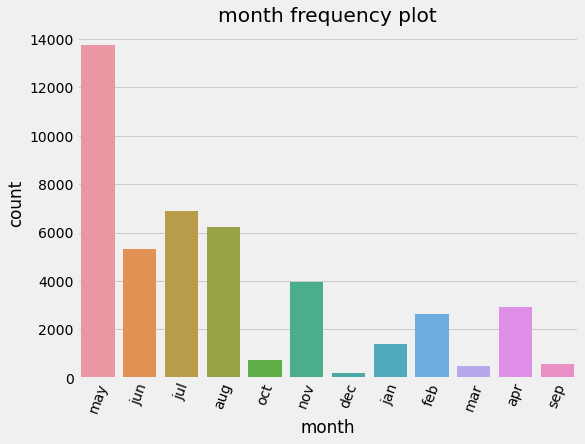

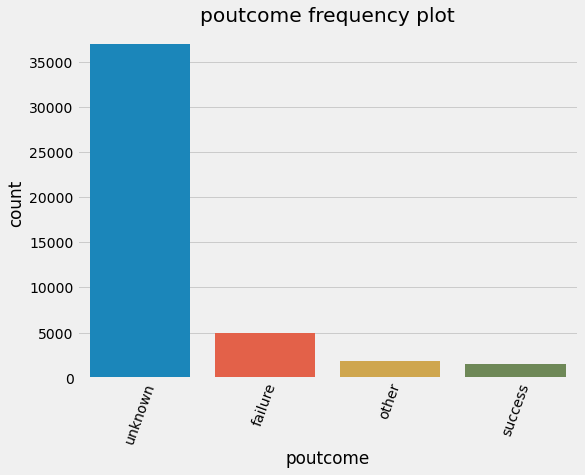

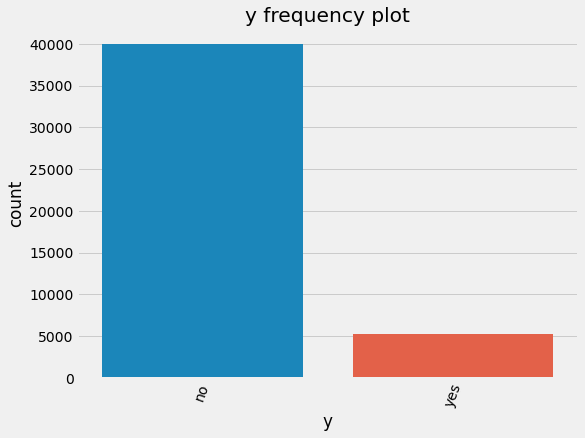

In [18]:
for feature in cat_var: 
    # make a copy of the datafrane 
    data = bank.copy()
    # plot a bar chart 
    plt.figure(figsize = (8, 6))
    sns.countplot(x = feature, data = data)
    plt.title(f'{feature} frequency plot') 
    plt.xticks(rotation = 70)
    plt.show()

### Categorical Variable vs Target variable

In [32]:
cat_var = [feature for feature in bank.columns if bank[feature].nunique() <= 12 and feature != 'y']
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

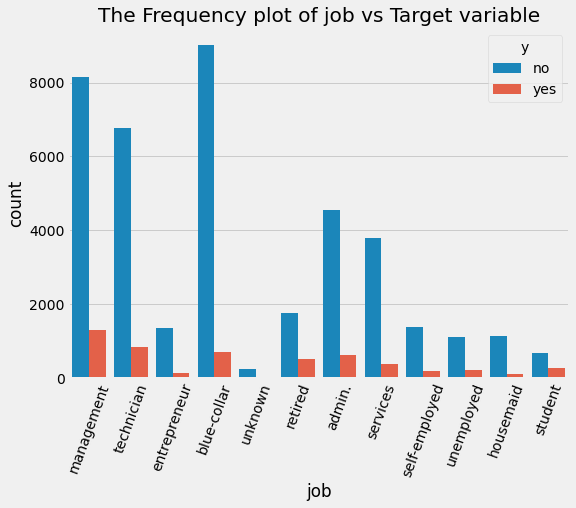

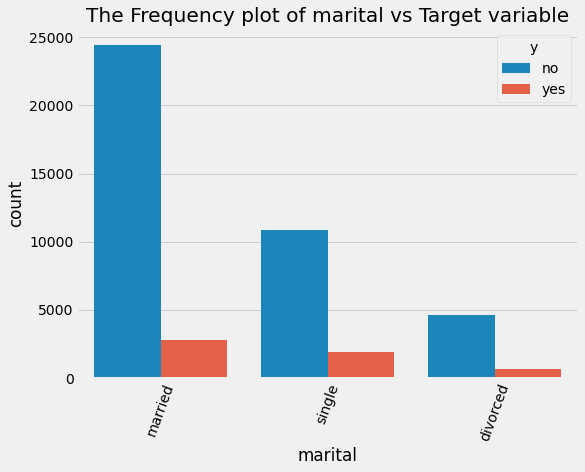

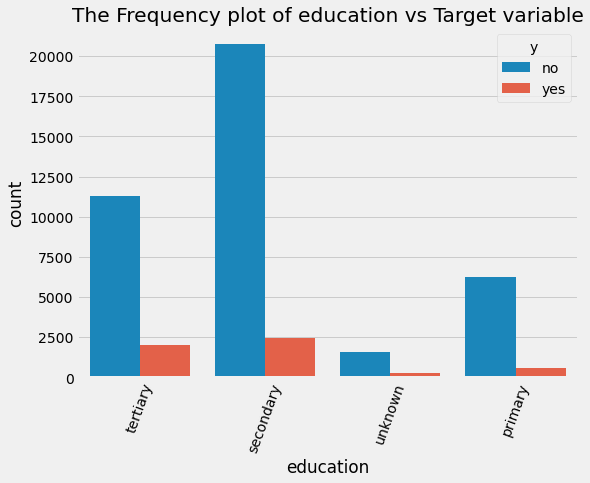

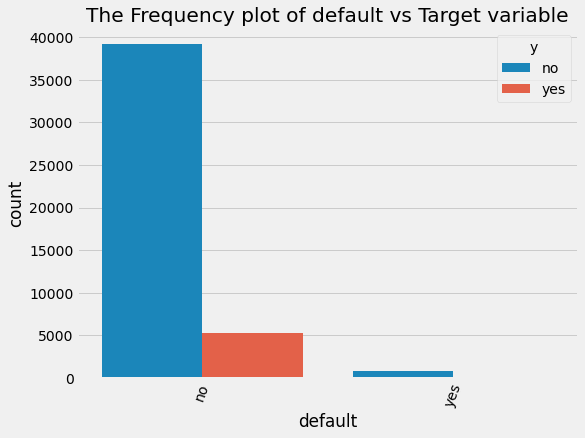

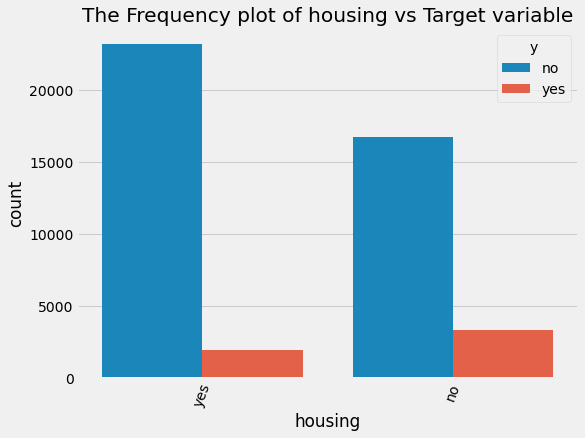

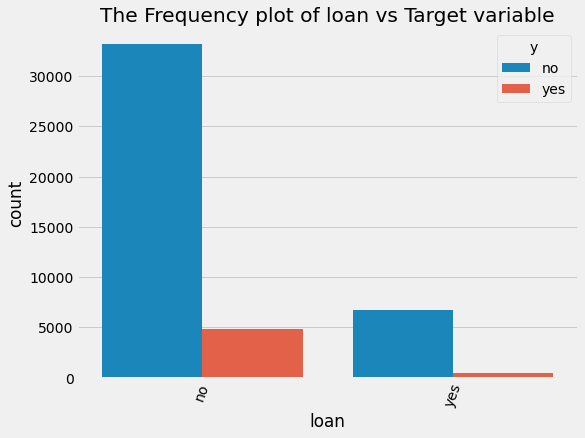

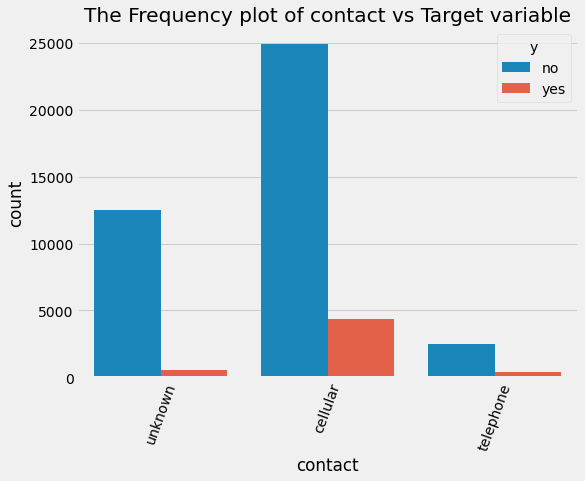

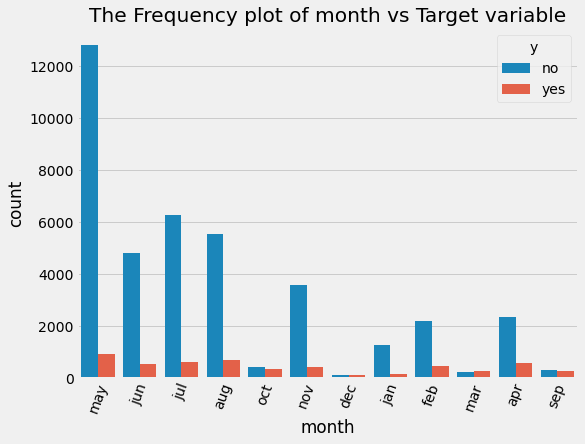

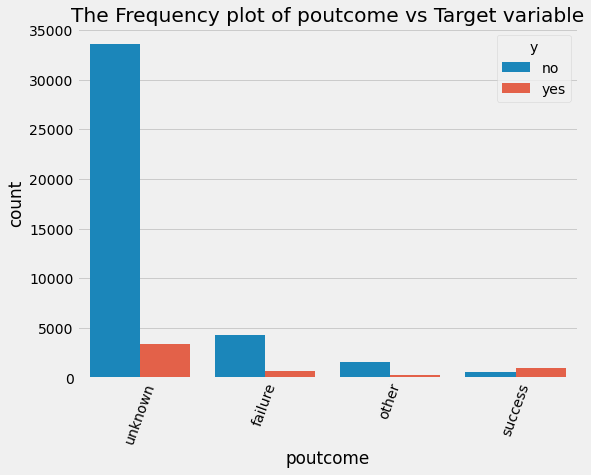

In [33]:
for feature in cat_var: 
    # make a copy of the datafrane 
    data = bank.copy()
    # plot a bar chart 
    plt.figure(figsize = (8, 6))
    sns.countplot(x = feature, data = data, hue = 'y')
    plt.title(f'The Frequency plot of {feature} vs Target variable') 
    plt.xticks(rotation = 70)
    plt.show()

### Numerical Variable 

- NUmerical variable in this dataset have nuque values grater than 12

In [6]:
# numerical variable
num_var = [feature for feature in bank.columns if bank[feature].nunique() > 12]
num_var

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [7]:
# top 5 records
bank[num_var].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


### Histogram distribution plot

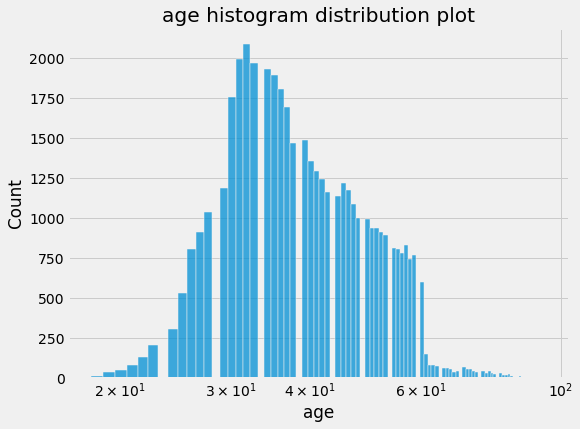

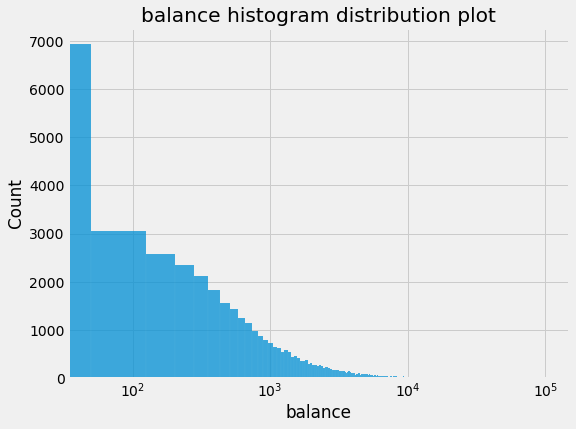

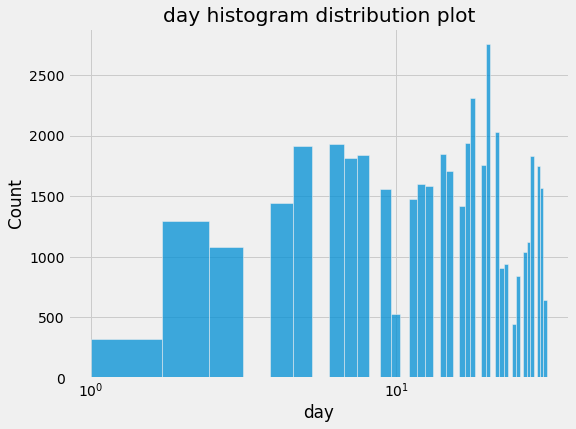

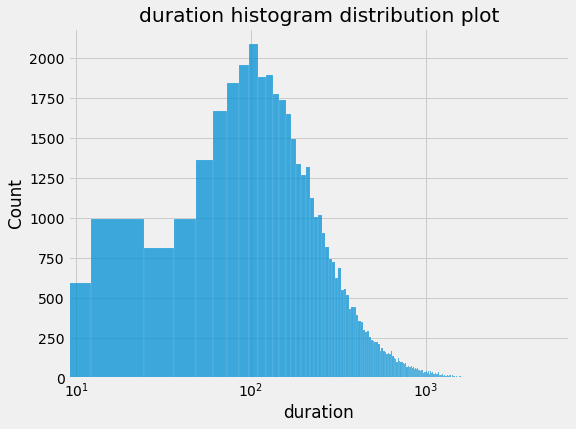

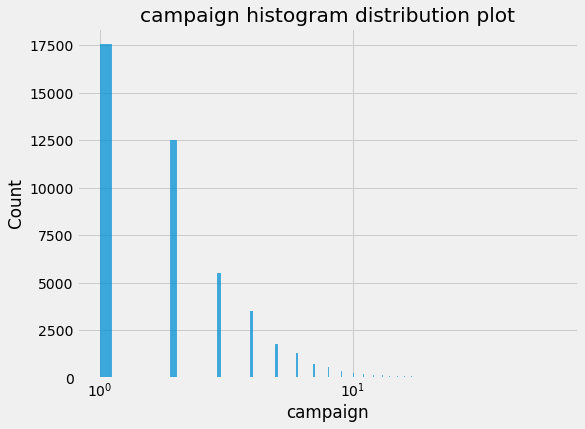

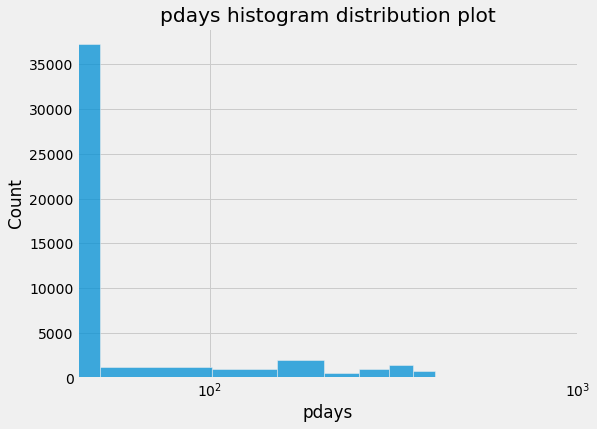

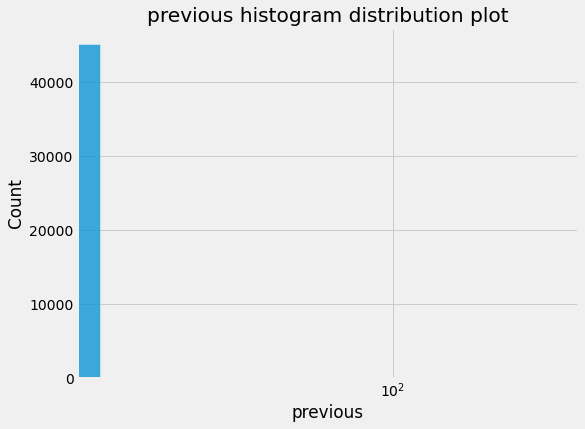

In [23]:
for feature in num_var: 
    # make a copy of the datafrane 
    data = bank.copy()
    # plot a bar chart 
    plt.figure(figsize = (8, 6))
    sns.histplot(x = feature, data = data)
    plt.xscale('log')
    plt.title(f'{feature} histogram distribution plot') 
    plt.show()

### Target variable vs Numerical Variable kde plot

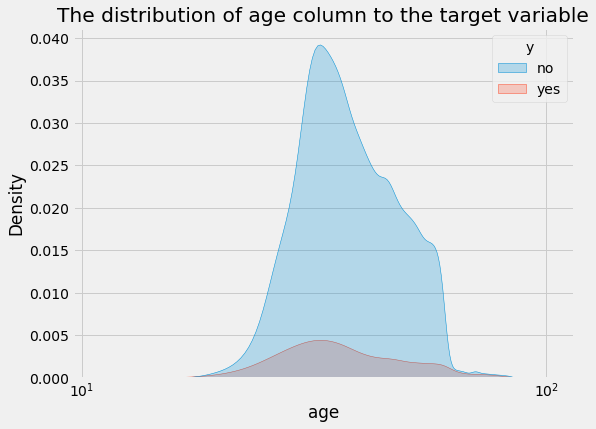

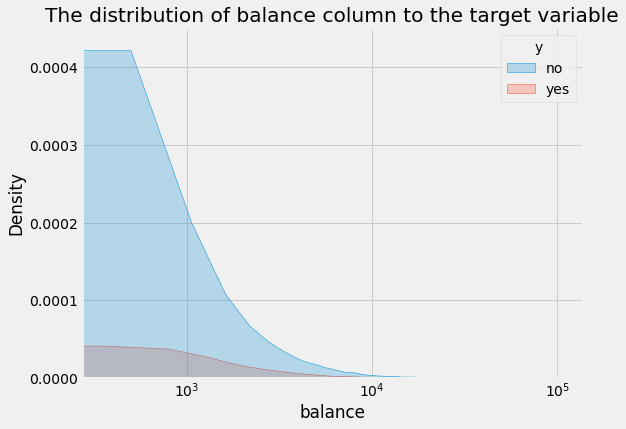

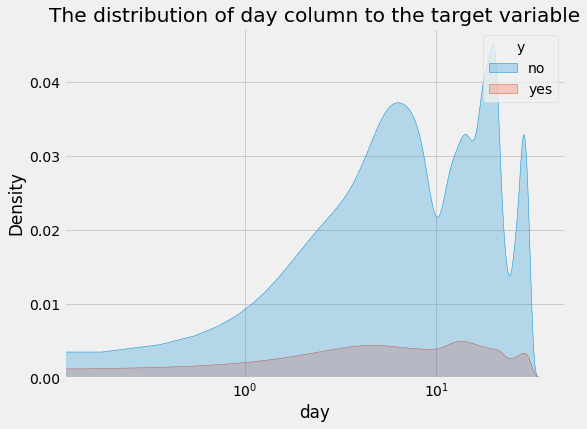

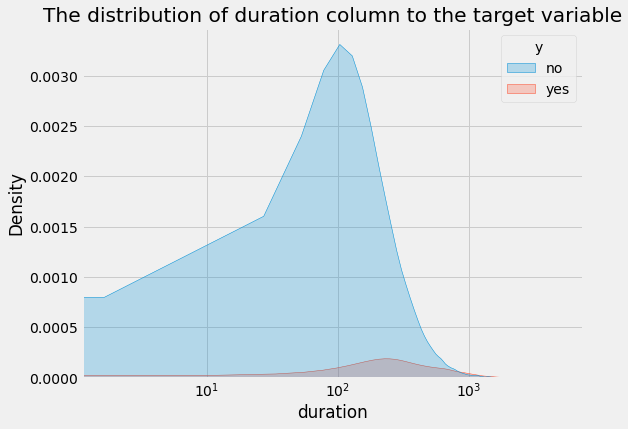

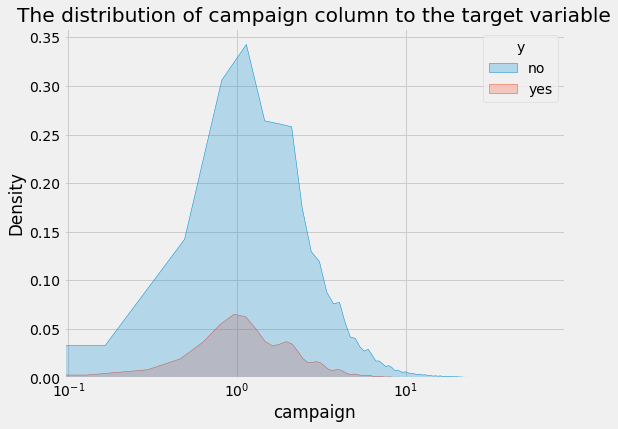

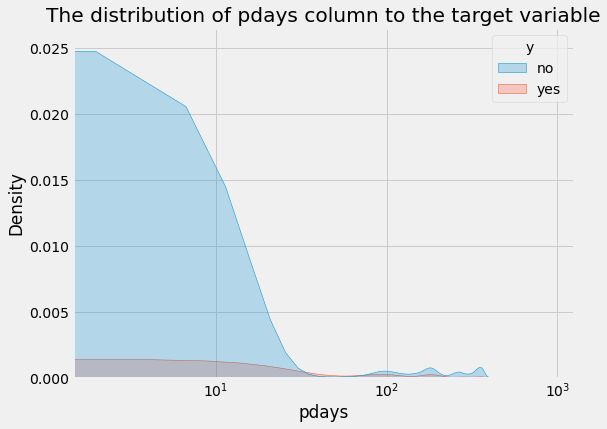

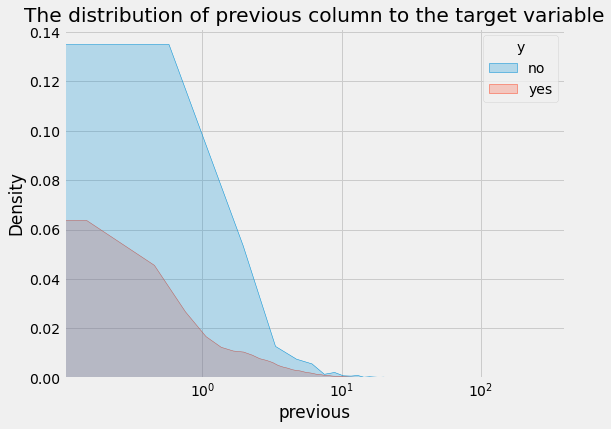

In [24]:
for feature in num_var: 
    # make a copy of the datafrane 
    data = bank.copy()
    # plot a bar chart 
    plt.figure(figsize = (8, 6))
    sns.kdeplot(x = feature, data = data, hue = 'y', fill = True)
    plt.xscale('log')
    plt.title(f'The distribution of {feature} column to the target variable') 
    plt.show()

### Boxplot: Outlier detection

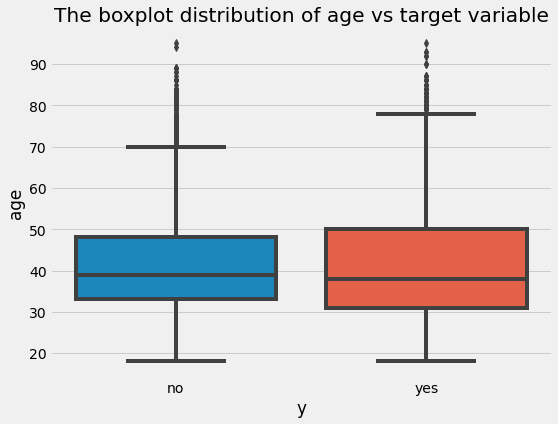

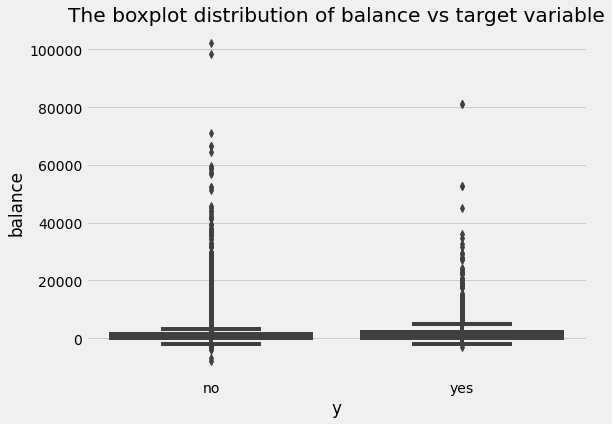

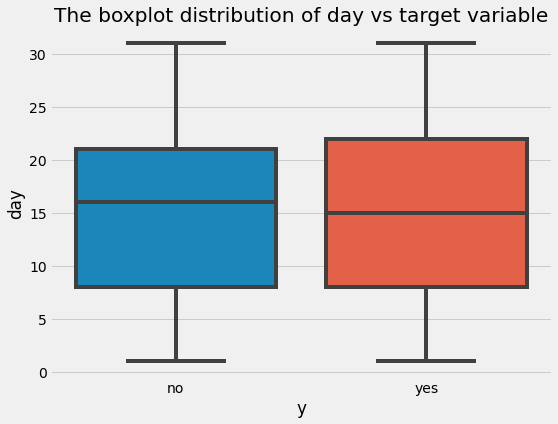

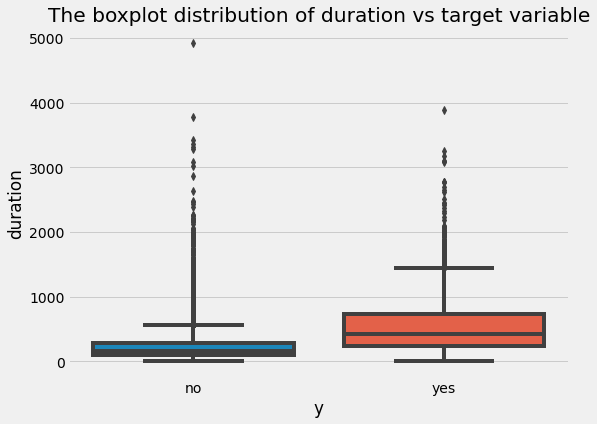

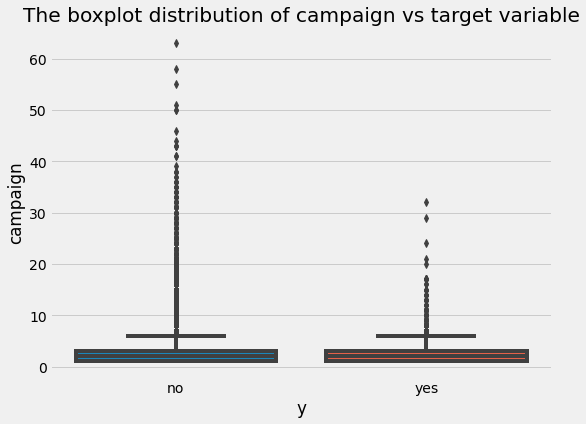

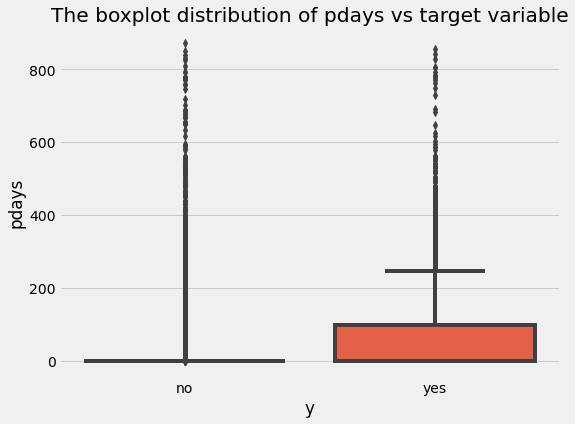

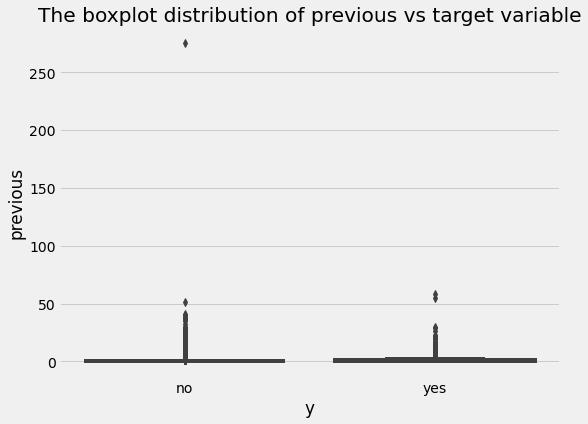

In [25]:
for feature in num_var: 
    # make a copy of the datafrane 
    data = bank.copy()
    # plot a bar chart 
    plt.figure(figsize = (8, 6))
    sns.boxplot(x = 'y', y = feature, data = data)
    plt.title(f'The boxplot distribution of {feature} vs target variable')
    plt.show()

### Feature Engineering

In [34]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [35]:
# Frequency encoding 
# mapping each variable to the value counts 
for feature in cat_var:
    # create  dictionar for variables and value counts  
    map_dict = bank[feature].value_counts().to_dict()
    bank[feature] = bank[feature].map(map_dict)

In [36]:
# top 5 records 
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,9458,27214,13301,44396,2143,25130,37967,13020,5,13766,261,1,-1,0,36959,no
1,44,7597,12790,23202,44396,29,25130,37967,13020,5,13766,151,1,-1,0,36959,no
2,33,1487,27214,23202,44396,2,25130,7244,13020,5,13766,76,1,-1,0,36959,no
3,47,9732,27214,1857,44396,1506,25130,37967,13020,5,13766,92,1,-1,0,36959,no
4,33,288,12790,1857,44396,1,20081,37967,13020,5,13766,198,1,-1,0,36959,no


### Split the dataset

In [37]:
# dependent and independent variables 
X = bank.drop('y', axis =1)
y = bank['y']

In [38]:
# import train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [39]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (33908, 16)
X_test shape:  (11303, 16)
y_train shape:  (33908,)
y_test shape:  (11303,)


### Feature Scaling: Standardization

In [41]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler 

# instantiate 
sts = StandardScaler() 

# fit and transform X_train 
X_train = sts.fit_transform(X_train) 

# fit and transform X_test 
X_test = sts.fit_transform(X_test)

### Modelling: Logistic Regression

In [27]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression 

# instantiate
log_reg = LogisticRegression(class_weight = {'no' : 0.2, 'yes' : 0.8})

# train 
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight={'no': 0.2, 'yes': 0.8})

In [28]:
# predict 
log_reg.predict_proba(X_test)

array([[0.6461802 , 0.3538198 ],
       [0.73305445, 0.26694555],
       [0.97561706, 0.02438294],
       ...,
       [0.16238125, 0.83761875],
       [0.9461223 , 0.0538777 ],
       [0.92707058, 0.07292942]])

In [29]:
# predict 
y_pred = log_reg.predict(X_test)

### Model Evaluation

In [30]:
# R2 score
log_reg.score(X_train, y_train)

0.8627167630057804

In [31]:
# R2 score
log_reg.score(X_test, y_test)

0.8600371582765638

In [32]:
from sklearn.metrics import confusion_matrix, classification_report 

# confusion matrix 
confusion_matrix(y_test, y_pred)

array([[8881, 1124],
       [ 458,  840]], dtype=int64)

<AxesSubplot:>

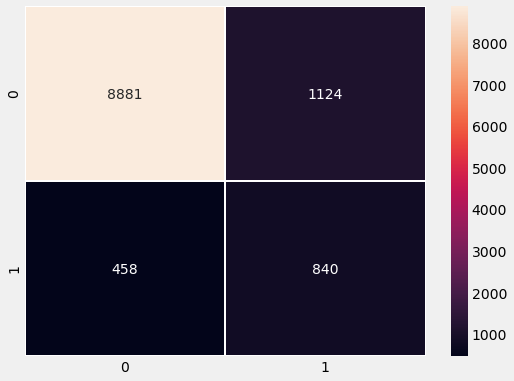

In [33]:
# confusion matrix heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, linewidth = 1, fmt = 'd')

In [34]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          no       0.89      0.95      0.92      9339
         yes       0.65      0.43      0.52      1964

    accuracy                           0.86     11303
   macro avg       0.77      0.69      0.72     11303
weighted avg       0.85      0.86      0.85     11303



In [54]:
coef = pd.DataFrame(log_reg.coef_).T 

coef.index = X.columns 

coef.rename(columns = {0 : 'coefficients'}, inplace=True)

In [56]:
coef.sort_values('coefficients', ascending = False)

,coefficients
duration,1.339366
loan,0.268424
contact,0.229380
balance,0.067756
default,0.060891
previous,0.012970
education,-0.010399
age,-0.012271
day,-0.054980
job,-0.091259


### Modelling: Support Vector Machine

In [65]:
# import SVC
from sklearn.svm import SVC 

# instantiate
svc_clf = SVC(kernel = 'rbf')

# train
svc_clf.fit(X_train, y_train)

SVC()

In [66]:
# predict
svc_y_pred = svc_clf.predict(X_test)

### Model Evaluation

In [67]:
# R2 score
svc_clf.score(X_train, y_train)

0.9027368172702607

In [68]:
# R2 score 
svc_clf.score(X_test, y_test)

0.898876404494382

In [69]:
confusion_matrix(y_test, svc_y_pred)

array([[9826,  179],
       [ 964,  334]], dtype=int64)

<AxesSubplot:>

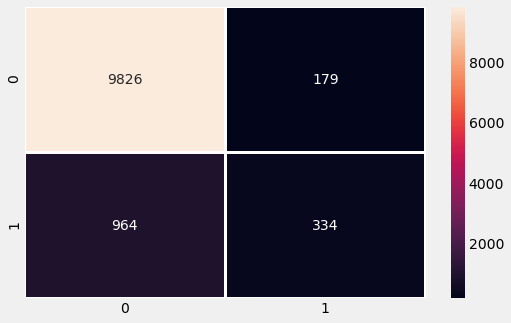

In [71]:
# heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot = True, fmt = 'd', linewidth = 2)

In [72]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10005
         yes       0.65      0.26      0.37      1298

    accuracy                           0.90     11303
   macro avg       0.78      0.62      0.66     11303
weighted avg       0.88      0.90      0.88     11303



### Modelling: k-Nearest Classifier

In [28]:
# import kNN class 
from sklearn.neighbors import KNeighborsClassifier 

# instantiate 
knn_clf = KNeighborsClassifier(n_neighbors=5)

# train 
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
knn_clf_y_pred = knn_clf.predict(X_test) 
knn_clf_y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

### Model Evaluation

In [30]:
# R2 score
knn_clf.score(X_train, y_train)

0.9177775156305297

In [31]:
# R2 score
knn_clf.score(X_test, y_test)

0.8918871096169159

In [32]:
from sklearn.metrics import confusion_matrix, classification_report 

# confusion matrix 
confusion_matrix(y_test, knn_clf_y_pred)

array([[9643,  362],
       [ 860,  438]], dtype=int64)

<AxesSubplot:>

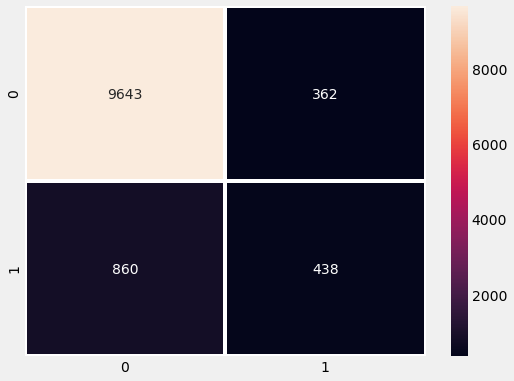

In [33]:
# heat map
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, knn_clf_y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [34]:
# recall, precision, f1-score
print(classification_report(y_test, knn_clf_y_pred))

              precision    recall  f1-score   support

          no       0.92      0.96      0.94     10005
         yes       0.55      0.34      0.42      1298

    accuracy                           0.89     11303
   macro avg       0.73      0.65      0.68     11303
weighted avg       0.88      0.89      0.88     11303



### Modelling: DecisionTreeClassifier

In [36]:
# import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 

# instantiate 
dt_clf = DecisionTreeClassifier()

# train 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# predict 
dt_clf_y_pred = dt_clf.predict(X_test)
dt_clf_y_pred

array(['yes', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [39]:
# R2-score
dt_clf.score(X_train, y_train)

1.0

In [40]:
# R2-score
dt_clf.score(X_test, y_test)

0.8702114482880651

- DecisionTreeClasssifier overfitted

### DecisionTreeClasssifier Hyperparameter Tuning with GridSearchCv

In [43]:
# import GridSearchCV 
from sklearn.model_selection import GridSearchCV

In [44]:
# max depth 
max_depth = np.arange(1, 16)
param_grid = {'max_depth' : max_depth}

In [45]:
dt_clf_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv = 5)

In [46]:
dt_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])})

In [47]:
dt_grid_results = pd.DataFrame(dt_clf_grid.cv_results_)
dt_grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.250185,0.055232,0.059796,0.013962,1,{'max_depth': 1},0.882336,0.882336,0.882188,0.882318,0.882318,0.882299,0.000056,15
1,0.197188,0.021719,0.047398,0.008114,2,{'max_depth': 2},0.893247,0.890003,0.893394,0.897803,0.891314,0.893152,0.002645,11
2,0.178789,0.011753,0.034599,0.002576,3,{'max_depth': 3},0.898408,0.901062,0.901799,0.900162,0.896918,0.899670,0.001782,7
3,0.177389,0.008822,0.028999,0.001096,4,{'max_depth': 4},0.902241,0.901651,0.903273,0.902079,0.899130,0.901675,0.001380,1
4,0.233986,0.066979,0.026799,0.002227,5,{'max_depth': 5},0.901651,0.899587,0.905338,0.900605,0.897950,0.901026,0.002478,4
5,0.188188,0.021747,0.023999,0.003406,6,{'max_depth': 6},0.901209,0.901357,0.903716,0.901047,0.897803,0.901026,0.001885,3
6,0.242185,0.010067,0.025599,0.004176,7,{'max_depth': 7},0.902831,0.901799,0.902978,0.899572,0.898245,0.901085,0.001871,2
7,0.265784,0.038966,0.024399,0.004883,8,{'max_depth': 8},0.901357,0.900029,0.903568,0.899867,0.895296,0.900023,0.002710,5
8,0.221586,0.005389,0.021399,0.001020,9,{'max_depth': 9},0.904158,0.896048,0.903716,0.900457,0.895591,0.899994,0.003643,6
9,0.230185,0.005269,0.021599,0.001744,10,{'max_depth': 10},0.900767,0.899882,0.901799,0.897803,0.889692,0.897988,0.004352,8


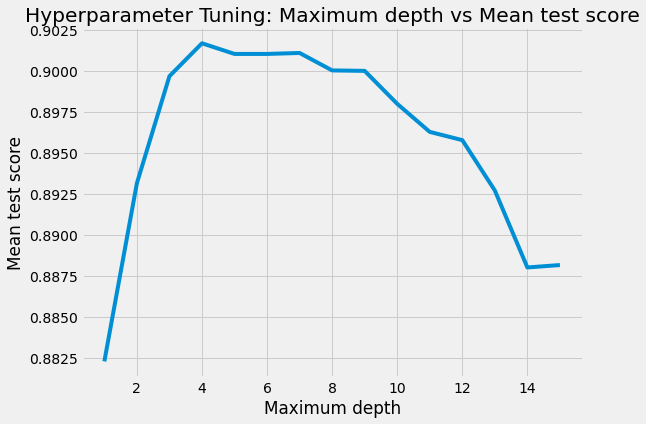

In [50]:
plt.figure(figsize = (8, 6))
plt.plot(dt_grid_results.param_max_depth, dt_grid_results.mean_test_score)
plt.xlabel('Maximum depth')
plt.ylabel('Mean test score')
plt.title('Hyperparameter Tuning: Maximum depth vs Mean test score')
plt.show()

In [48]:
dt_clf_grid.best_params_

{'max_depth': 4}

### Modelling with Hyperparameters

In [51]:
# instantiate 
dt_grid = DecisionTreeClassifier(max_depth = 4)

# train 
dt_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [57]:
# predict
dt_grid_y_pred = dt_grid.predict(X_test)
dt_grid_y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

### Model Evaluation

In [55]:
# R2-score
dt_grid.score(X_train, y_train)

0.9046537690220597

In [54]:
# R2-score
dt_grid.score(X_test, y_test)

0.8914447491816332

In [58]:
from sklearn.metrics import confusion_matrix, classification_report 

# confusion matrix 
confusion_matrix(y_test, dt_grid_y_pred)

array([[9713,  292],
       [ 935,  363]], dtype=int64)

<AxesSubplot:>

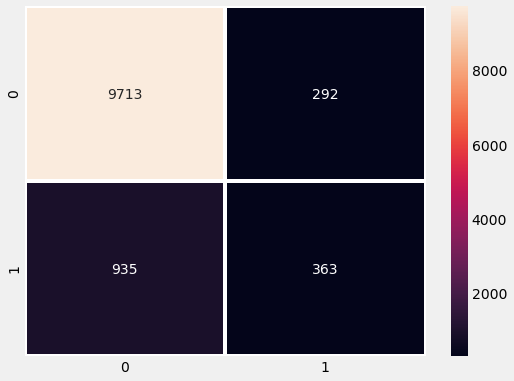

In [59]:
# heat map
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, dt_grid_y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [61]:
# confusion matrix 
print(classification_report(y_test, dt_grid_y_pred))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94     10005
         yes       0.55      0.28      0.37      1298

    accuracy                           0.89     11303
   macro avg       0.73      0.63      0.66     11303
weighted avg       0.87      0.89      0.88     11303



In [33]:
# import SVC
from sklearn.ensemble import RandomForestClassifier 

# instantiate
rf_clf = RandomForestClassifier()

# train
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# predict unseen test data 
rf_clf_y_pred = rf_clf.predict(X_test)
rf_clf_y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [35]:
# R2-score
rf_clf.score(X_train, y_train)

1.0

In [36]:
# R2-score
rf_clf.score(X_test, y_test)

0.8956029372732903

### Model Evaluation

In [38]:
# import metrics
from sklearn.metrics import confusion_matrix, classification_report 

# confusion_matrix 
confusion_matrix(y_test, rf_clf_y_pred)

array([[9672,  333],
       [ 847,  451]], dtype=int64)

<AxesSubplot:>

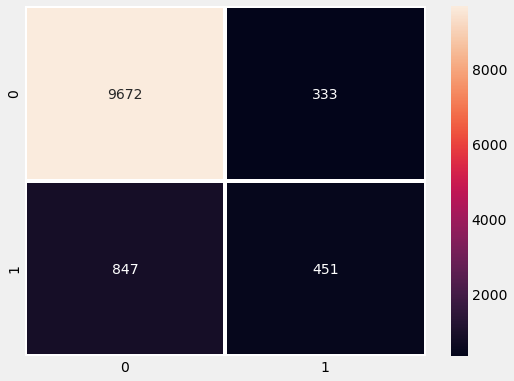

In [39]:
# heat map
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, rf_clf_y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [41]:
# recall, precison, f1-score 
print(classification_report(y_test, rf_clf_y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94     10005
         yes       0.58      0.35      0.43      1298

    accuracy                           0.90     11303
   macro avg       0.75      0.66      0.69     11303
weighted avg       0.88      0.90      0.88     11303



### Modelling: Adaptive Boosting Classifier

In [49]:
# import AdaBoost class 
from sklearn.ensemble import AdaBoostClassifier 

# instantiate 
ab_clf = AdaBoostClassifier(n_estimators = 100)

# train 
ab_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [50]:
# predict unseen test data 
ab_clf_y_pred = ab_clf.predict(X_test)
ab_clf_y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [51]:
# R2-score
ab_clf.score(X_train, y_train)

0.9029137666627345

In [52]:
# R2-score
ab_clf.score(X_test, y_test)

0.8936565513580466

In [53]:
# import metrics
from sklearn.metrics import confusion_matrix, classification_report 

# confusion_matrix 
confusion_matrix(y_test, ab_clf_y_pred)

array([[9707,  298],
       [ 904,  394]], dtype=int64)

<AxesSubplot:>

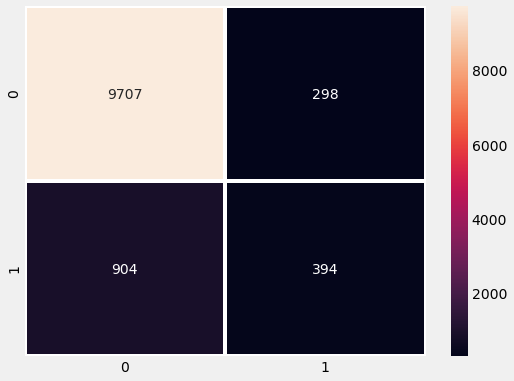

In [54]:
# heat map
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, ab_clf_y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [56]:
# recall, precision, f1-score
print(classification_report(y_test, ab_clf_y_pred))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94     10005
         yes       0.57      0.30      0.40      1298

    accuracy                           0.89     11303
   macro avg       0.74      0.64      0.67     11303
weighted avg       0.88      0.89      0.88     11303

